<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/4m_lr7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Левая прогонка, N=10
0.00  -0.500000
0.10  -0.526316
0.20  -0.555556
0.30  -0.588235
0.40  -0.625000
0.50  -0.666667
0.60  -0.714286
0.70  -0.769231
0.80  -0.833333
0.90  -0.909091
1.00  -1.000000

РК4, N=10
0.00  -0.500000
0.10  -0.526316
0.20  -0.555556
0.30  -0.588236
0.40  -0.625001
0.50  -0.666668
0.60  -0.714288
0.70  -0.769233
0.80  -0.833335
0.90  -0.909092
1.00  -1.000000

Погрешность (прогонка): 6.661338e-16
Погрешность (РК4): 2.033467e-06


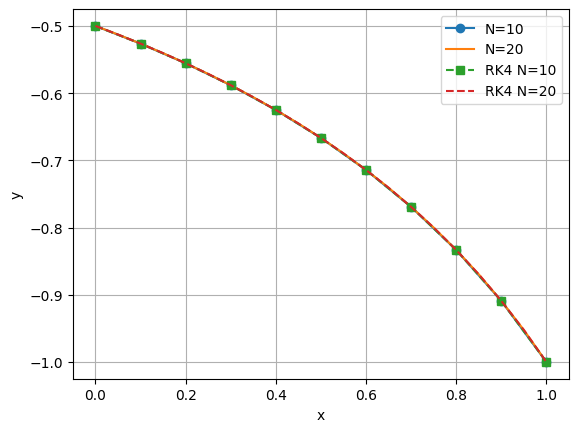

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#коэффициенты
def p(x):
    return 2 / (x - 2)

def q(x):
    return x - 2

def f(x):
    return 1.0

a, b = 0.0, 1.0
ya, yb = -0.5, -1.0

#ЛЕВАЯ ПРОГОНКА
def left_sweep(N):
    h = (b - a) / N
    x = np.linspace(a, b, N + 1)

    A = np.zeros(N + 1)
    B = np.zeros(N + 1)
    C = np.zeros(N + 1)
    D = np.zeros(N + 1)

    for i in range(1, N):
        A[i] = 1/h**2 - p(x[i])/(2*h)
        B[i] = -2/h**2 + q(x[i])
        C[i] = 1/h**2 + p(x[i])/(2*h)
        D[i] = f(x[i])

    B[0] = 1
    D[0] = ya
    B[N] = 1
    D[N] = yb

    alpha = np.zeros(N + 1)
    beta = np.zeros(N + 1)

    alpha[0] = 0
    beta[0] = D[0] / B[0]

    for i in range(1, N + 1):
        denom = B[i] + A[i] * alpha[i-1]
        alpha[i] = -C[i] / denom if i < N else 0
        beta[i] = (D[i] - A[i] * beta[i-1]) / denom

    y = np.zeros(N + 1)
    y[N] = beta[N]
    for i in range(N-1, -1, -1):
        y[i] = alpha[i] * y[i+1] + beta[i]

    return x, y

#РК4 ДЛЯ СИСТЕМЫ
def rk4_system(N, y0, z0, homogeneous=False):
    h = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = np.zeros(N + 1)
    z = np.zeros(N + 1)

    y[0], z[0] = y0, z0

    for i in range(N):
        def F(x, y, z):
            return z

        def G(x, y, z):
            return -p(x)*z - q(x)*y + (0 if homogeneous else f(x))

        k1y = h * F(x[i], y[i], z[i])
        k1z = h * G(x[i], y[i], z[i])

        k2y = h * F(x[i]+h/2, y[i]+k1y/2, z[i]+k1z/2)
        k2z = h * G(x[i]+h/2, y[i]+k1y/2, z[i]+k1z/2)

        k3y = h * F(x[i]+h/2, y[i]+k2y/2, z[i]+k2z/2)
        k3z = h * G(x[i]+h/2, y[i]+k2y/2, z[i]+k2z/2)

        k4y = h * F(x[i]+h, y[i]+k3y, z[i]+k3z)
        k4z = h * G(x[i]+h, y[i]+k3y, z[i]+k3z)

        y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y)/6
        z[i+1] = z[i] + (k1z + 2*k2z + 2*k3z + k4z)/6

    return x, y

def rk4_bvp(N):
    x, y1 = rk4_system(N, ya, 0)
    _, y2 = rk4_system(N, 0, 1, homogeneous=True)

    C = (yb - y1[-1]) / y2[-1]
    y = y1 + C * y2
    return x, y

#РАСЧЁТЫ
x10_s, y10_s = left_sweep(10)
x20_s, y20_s = left_sweep(20)

x10_r, y10_r = rk4_bvp(10)
x20_r, y20_r = rk4_bvp(20)

#ТАБЛИЦЫ
print("Левая прогонка, N=10")
for xi, yi in zip(x10_s, y10_s):
    print(f"{xi:.2f}  {yi:.6f}")

print("\nРК4, N=10")
for xi, yi in zip(x10_r, y10_r):
    print(f"{xi:.2f}  {yi:.6f}")

#ПОГРЕШНОСТЬ
err_sweep = np.max(np.abs(y10_s - y20_s[::2]))
err_rk4 = np.max(np.abs(y10_r - y20_r[::2]))

print(f"\nПогрешность (прогонка): {err_sweep:.6e}")
print(f"Погрешность (РК4): {err_rk4:.6e}")

#ГРАФИК
plt.figure()
plt.plot(x10_s, y10_s, "o-", label="N=10")
plt.plot(x20_s, y20_s, "-", label="N=20")
plt.plot(x10_r, y10_r, "s--", label="RK4 N=10")
plt.plot(x20_r, y20_r, "--", label="RK4 N=20")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("lab7_variant2.png")
plt.show()
